# Analysis of MNIST data
* Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
* Chapter 3. Classification

In [35]:
# Load data from sklearn's datasets package
from sklearn import datasets
mnist = datasets.load_digits()

In [36]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [37]:
X,y = mnist['data'], mnist['target']

In [38]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt

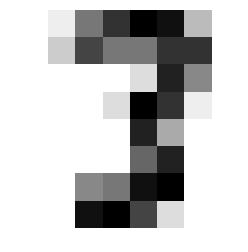

In [40]:
some_digit = X[23]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [41]:
train_data_size = int(len(X)*0.2) + 1
X_train, y_train = X[:train_data_size], y[:train_data_size]
X_test, y_test = X[train_data_size:], y[train_data_size:]

In [42]:
print(X_test.shape)
print(X_train.shape)


(1437, 64)
(360, 64)


### Training a Binary Classifier

* Let’s simplify the problem for now and only try to identify one digit—for
example, the number 5. This “5-detector” will be an example of a binary
classifier, capable of distinguishing between just two classes, 5 and not-5.


In [43]:
# Need to change the target values for binary classifier problem. 
# Now target value is boolean i.e. True if digit is 5 False otherwise
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [44]:
y_train_5[:5]

array([False, False, False, False, False])

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=47)
sgd_clf.fit(X_train, y_train_5)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=47, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [46]:
sgd_clf.predict([some_digit])

array([False])

## Perfomance Measure using Cross-Validation
* You could make predictions on
the test set, but let’s keep it untouched for now (remember that you want to use
the test set only at the very end of your project, once you have a classifier that
you are ready to launch). Instead, you can use the cross_val_score()
function to measure classifier performance using the "training data" only.

###### NOTE: 
** Just like the cross_val_score() function, cross_val_predict()
performs K-fold cross-validation, but instead of returning the evaluation scores, it
returns the predictions made on each test fold.

#### 1. Performace metric: "Accuracy"


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

array([0.96666667, 0.975     , 0.98333333])

* Above 96% accuracy on all three folds using Stochastic Gradient Descent Clissifier. This looks amazing does not it? Well, before conclude something let us try a very dumb classifier that just clissfies every single image as "not-5" class.

In [49]:
from sklearn.base import BaseEstimator
import numpy as np

class dumbclassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [50]:
dumb_clf = dumbclassifier()
cross_val_score(dumb_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9, 0.9, 0.9])

* That’s right, it has over 90% accuracy! This is simply because only about 10% of
the images are 5s, so if you always guess that an image is not a 5, you will be
right about 90% of the time.

### Conclusion1: 
* "Accuracy" generally is not the preferred performance measure of classifiers, especially when data is highly skewed(Data Imbalance Problem).



    
#### 2. Performace metric: "Confusion Matrix(Precision & Recall)"
* To compute the confusion matrix, you first need to have a set of predictions so
that they can be compared to the actual targets.

In [51]:
# Do not be confused with cross_val_score and cross_val_predict, both will perform k-fold cross validation,
# the only difference is in their return values. cross_val_score returns the evaluation scores for each fold but
# cross_val_predict returns the predictions made on each test fold.

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

In [52]:
# Now we are ready to get the confusion matrix since we have both predition and actual targets
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[320,   4],
       [  5,  31]])

* A perfect classifier would
have only true positives and true negatives, so its confusion matrix would have
nonzero values only on its main diagonal (top left to bottom right):

In [53]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8857142857142857
0.8611111111111112


In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8732394366197184

#### NOTE:
* The F 1 score favors classifiers that have similar precision and recall. This is not
always what you want: in some contexts you mostly care about precision, and in
other contexts you really care about recall.

#### Precision/Recall Trade-off
* Instead of calling
the classifier’s predict() method, you can call its decision_function()
method, which returns a score for each instance, and then use any threshold you
want to make predictions based on those scores:

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)
threshold = -9000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[-8305.25793025]
[False]
[ True]


* How do you decide which threshold to use? First, use the
cross_val_predict() function to get the scores of all instances in the
training set, but this time specify that you want to return decision scores instead
of predictions
* With these scores, use the precision_recall_curve() function to compute
precision and recall for all possible thresholds

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

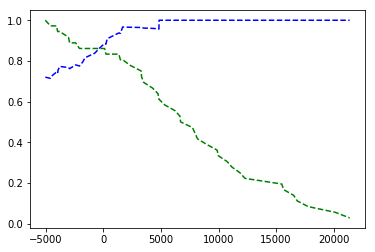

In [24]:
#plt.title("Precision and recall versus the decision threshold")
def plot_precesion_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    
    
plot_precesion_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
print(precisions.shape)
print(thresholds.shape)

(51,)
(50,)


In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [27]:
y_train_pred_precision_90 = (y_scores >= threshold_90_precision)

In [28]:
print(precision_score(y_train_5, y_train_pred_precision_90))
print(recall_score(y_train_5, y_train_pred_precision_90))

0.9090909090909091
0.8333333333333334


#### The ROC Curve
* The receiver operating characteristic (ROC) curve is another common tool used
with binary classifiers. It is very similar to the precision/recall curve, but instead
of plotting precision versus recall, the ROC curve plots the true positive rate
(another name for recall) against the false positive rate. The FPR is the ratio of
negative instances that are incorrectly classified as positive. It is equal to 1 – the
true negative rate, which is the ratio of negative instances that are correctly
classified as negative. The TNR is also called specificity. Hence the ROC curve
plots sensitivity (recall) versus 1 – specificity.

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholdd = roc_curve(y_train_5, y_scores)

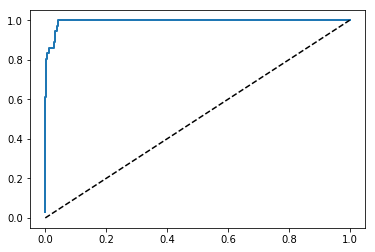

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

* One way to compare classifiers is to measure the area under the curve (AUC). A
perfect classifier will have a ROC AUC equal to 1, whereas a purely random
classifier will have a ROC AUC equal to 0.5

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.994170096021948

###### Compare Random Forest and SGDClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [57]:
y_probas_forest[:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [58]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

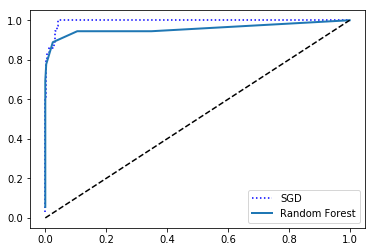

In [59]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [60]:
roc_auc_score(y_train_5, y_scores)

0.994170096021948

In [61]:
roc_auc_score(y_train_5, y_scores_forest)

0.9572616598079561

## Multiclass Classification
* Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive
Bayes classifiers) are capable of handling multiple classes natively. Others (such
as Logistic Regression or Support Vector Machine classifiers) are strictly binary
classifiers. However, there are various strategies that you can use to perform
multiclass classification with multiple binary classifiers.
* Scikit-Learn detects when you try to use a binary classification algorithm for a
multiclass classification task, and it automatically runs OvA or OvR, depending
on the algorithm. Let’s try this with a support vector machine classifier (see
Chapter 5), using the sklearn.svm.SVC class:

In [62]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([3])

* That was easy! This code trains the SVC on the training set using the original
target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes
(y_train_5). Then it makes a prediction (a correct one in this case). Under the
hood, Scikit-Learn actually used the OvO strategy: it trained 45 binary
classifiers, got their decision scores for the image, and selected the class that won
the most duels.
* If you call the decision_function() method, you will see that it returns 10
scores per instance (instead of just one). That’s one score per class:

In [64]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 5.95161557,  7.96759162,  4.95098078,  9.5       , -0.07522522,
         6.95355697,  0.93356579,  3.94597748,  2.93641456,  1.93552245]])

In [67]:
# Which class 'some_digit' belongs according to this model.
max_index = np.argmax(some_digit_scores)
svm_clf.classes_[max_index]

3

* If you want to force Scikit-Learn to use one-versus-one or one-versus-all, you
can use the OneVsOneClassifier or OneVsRestClassifier classes.
Simply create an instance and pass a classifier to its constructor (it does not even
have to be a binary classifier). For example, this code creates a multiclass
classifier using the OvA strategy, based on an SVC:

In [68]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([3])

In [71]:
# Number of classfier used to make final prediction.
len(ovr_clf.estimators_)

10

###### Train SGDClassifier
* Just above this we have trained a binary classifier to classify multiple classes using OvO & OvR
* Now we train SGDClassifier which is a multiclass classifier so do not need to use OvO & OvR
* This time Scikit-Learn did not have to run OvA or OvO because SGD classifiers
can directly classify instances into multiple classes

In [72]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3])

In [73]:
sgd_clf.decision_function([some_digit])

array([[-10371.77272114, -18797.98541645,  -5804.32033484,
          9240.97070991, -28222.51100134,  -8305.25793025,
        -20123.88215947,  -8195.86166261,  -8857.76894727,
        -13813.3710668 ]])

* Now of course you
want to evaluate this classifier. As usual, you can use cross-validation. Use the
cross_val_score() function to evaluate the SGDClassifier’s accuracy:

In [74]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

array([0.85365854, 0.85833333, 0.88034188])

* It gets over 85% on all test folds.

###### Train Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=47)
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.82113821, 0.90833333, 0.79487179])

* So these(SGD and Random Forest) is not such a bad score, but you can still do much better.
Simply scaling the inputs (as discussed in Chapter 2) increases accuracy above 89%:

###### Re-try SGDClassifier after scaling features
* StandardScaler class perform scalling only on numerical features. It ignores the catagorical features, So we need to do scalling for catagorical features with other ways. But for this problem we do not have any catagorical feature.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

array([0.89430894, 0.96666667, 0.8974359 ])

In [80]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.82113821, 0.90833333, 0.8034188 ])

# Conclusion
* We could clearly see the significant impromvement on SGDClassifier's performance due to scalling.
* So remember scaling the features play an important role on the overall performance of the classfier.


# Error Analysis
* You’d explore data preparation options, try
out multiple models, shortlisting the best ones and fine-tuning their
hyperparameters using GridSearchCV, and automate as much as possible.
* Here,
we will assume that you have found a promising model and you want to find
ways to improve it. One way to do this is to analyze the types of errors it makes
* First, look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix()
function, just like you did earlier

In [82]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

In [83]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [84]:
conf_mx

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  3,  0],
       [ 0,  3, 32,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  3,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  1,  4],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 32,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  1,  0,  0,  3,  1,  0, 29]])

###### TIP
* That’s a lot of numbers. It’s often more convenient to look at an image
representation of the confusion matrix, using Matplotlib’s matshow() function:

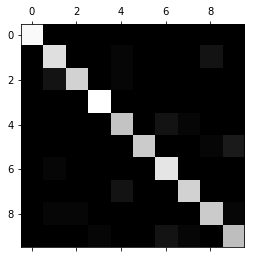

In [85]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

* Let’s focus the plot on the errors. First, you need to divide each value in the
confusion matrix by the number of images in the corresponding class so that you
can compare error rates instead of absolute number of errors (which would make
abundant classes look unfairly bad):

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[38],
       [38],
       [36],
       [39],
       [34],
       [36],
       [36],
       [35],
       [34],
       [34]])

In [90]:
norm_conf_mx = conf_mx/row_sums

* Fill the diagonal with zeros to keep only the errors, and plot the result:

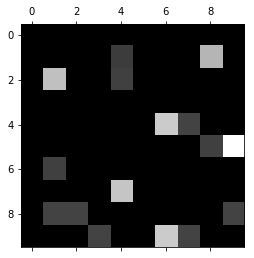

In [92]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* You can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The column
for class 8 is quite bright, which tells you that many images get misclassified as
8s. However, the row for class 8 is not that bad, telling you that actual 8s in
general get properly classified as 8s. As you can see, the confusion matrix is not
necessarily symmetrical. You can also see that 3s and 5s often get confused (in
both directions).

##### NOTE:
* Analyzing the confusion matrix often gives you insights into ways to improve
your classifier. Looking at this plot, it seems that your efforts should be spent on
reducing the false 8s. For example, you could try to gather more training data for
digits that look like 8s (but are not) so that the classifier can learn to distinguish
them from real 8s. Or you could engineer new features that would help the
classifier—for example, writing an algorithm to count the number of closed loops
(e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g.,
using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed
loops, stand out more.

* Analyzing individual errors can also be a good way to gain insights on what your
classifier is doing and why it is failing, but it is more difficult and time-
consuming. For example, let’s plot examples of 3s and 5s (the plot_digits()
function just uses Matplotlib’s imshow() function

ValueError: cannot reshape array of size 1600 into shape (8,8)

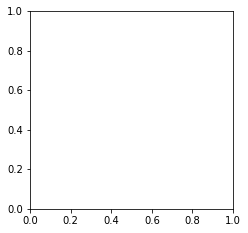

In [97]:
def plot_digits(X,images_per_row):
    X = X.reshape(8,8)
    plt.imshow(X, cmap="binary")
    plt.axis("off")

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilabel Classification
* pending need to learn